In [103]:
%load_ext autoreload
%autoreload 2

from ble import get_ble_controller
from base_ble import LOG
from cmd_types import CMD
import time
import numpy as np
import matplotlib.pyplot as plt

LOG.propagate = False

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
LOG.debug("debug")
LOG.info("info")
LOG.warning("warning")
LOG.error("error")
LOG.critical("critical")

In [748]:
# Get ArtemisBLEController object
ble = get_ble_controller()

# Connect to the Artemis Device
ble.connect()

2024-03-12 17:02:53,521 | INFO     |: Looking for Artemis Nano Peripheral Device: c0:83:85:6a:10:3c
2024-03-12 17:02:56,019 | INFO     |: Connected to c0:83:85:6a:10:3c


In [749]:
# Disconnect
ble.disconnect()

2024-03-12 17:03:57,277 | INFO     |: Disconnected from 7315ECF9-6B84-A5C2-70AD-646152192D8B


In [ ]:
ble.send_command(CMD.ECHO, "the fitness gram pacer test")

In [713]:
ble.send_command(CMD.ADJUST_PWM_VALS, "255|160|0.2|0.0|-0.2")

In [ ]:
ble.send_command(CMD.MOVE_FORWARD_TIMED, "40|2500")

In [ ]:
ble.send_command(CMD.GET_DIST_DATA, "")

In [747]:
stamped_data.clear()
ble.send_command(CMD.PID_TO_WALL, "304")

2024-03-10 17:59:57,051 | INFO     |: Disconnected from 7315ECF9-6B84-A5C2-70AD-646152192D8B


In [421]:
ble.send_command(CMD.MOVE_WHEELS_TIMED, "30|30|2000")

# left 48 right 76 for moving for lab 4



r_l_pwm: 76, cur_r_pwm: 48


In [426]:
# open loop control
ble.send_command(CMD.MOVE_FORWARD_TIMED, "40|2000")
ble.send_command(CMD.BRAKE_MOTORS, "")
ble.send_command(CMD.MOVE_FORWARD_TIMED, "-40|2000")
ble.send_command(CMD.BRAKE_MOTORS, "")
ble.send_command(CMD.MOVE_WHEELS_TIMED, "-70|70|5000")

r_l_pwm: 102, cur_r_pwm: 64
r_l_pwm: 102, cur_r_pwm: 64
r_l_pwm: 178, cur_r_pwm: 112


In [698]:
def notification_handler(uuid, char_val_array):
    str_data = char_val_array.decode()[2:]
    print(str_data)

ble.start_notify(ble.uuid['RX_STRING'], notification_handler)

In [ ]:
stamped_data = []

def notification_handler(uuid, char_val_array):
    str_data = char_val_array.decode()[2:]
    data = str_data.split(',')
    stamped_data.append(data)

ble.start_notify(ble.uuid['RX_STRING'], notification_handler)

In [664]:
stamped_data.clear()
ble.send_command(CMD.GET_PID_DATA, "")

In [741]:
time_data = []
dist0_data = []
dist1_data = []
vel_data = []
for data_list in stamped_data:
    assert(len(data_list) >= 1)
    time_data.append((int(data_list[0]) - int(stamped_data[0][0])) / 1000.)
    dist0_data.append(int(data_list[1]))
    dist1_data.append(int(data_list[2]))
    vel_data.append(float(data_list[3]))

print("raw data len: " + str(len(dist0_data)))

raw data len: 1000


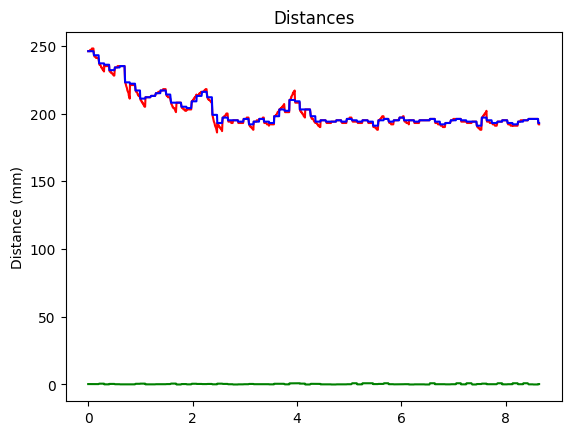

In [742]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft

time = np.array(time_data)
dist0 = np.array(dist0_data)
dist1 = np.array(dist1_data)
vel = np.array(vel_data)

plt.plot(time, dist0, 'r')
plt.plot(time, dist1, 'b')
plt.plot(time, vel, 'g')
plt.ylabel('Distance (mm)')
plt.title("Distances")
plt.show()

In [649]:
ble.send_command(CMD.BRAKE_MOTORS, "")

In [356]:
s = ble.receive_string(ble.uuid['RX_STRING'])
print(s)

L_MOTOR_MAX: 255, R_MOTOR_MAX: 180, p_val: 0, i_val: 0, d_val: 0


In [ ]:
ble.stop_notify(ble.uuid['RX_STRING'])